# O dataset inclui as seguintes variáveis:


*   age: Idade do paciente.

*   sex: Sexo (1 = masculino; 0 = feminino).
*   cp: Tipo de dor no peito (4 valores: 1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 4 = assintomática).
*   trestbps: Pressão arterial em repouso (mm Hg).
*   chol: Colesterol sérico em mg/dl.
*   fbs: Açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso).
*   restecg: Resultados do eletrocardiograma em repouso (0 = normal; 1 = com anormalidade na onda ST-T; 2 = hipertrofia ventricular esquerda).
*   thalach: Frequência cardíaca máxima atingida.
*   exang: Angina induzida por exercício (1 = sim; 0 = não).
*   oldpeak: Depressão do segmento ST induzida por exercício em relação ao repouso.
*   slope: Inclinação do segmento ST no pico do exercício (1 = subida; 2 = plana; 3 = descendente).
*   ca: Número de vasos principais (0-3) coloridos por fluoroscopia.
*   thal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível.
*   target: Diagnóstico de doença cardíaca (1 = presença de doença; 0 = ausência de doença).


In [167]:
#Carregandos bibliotecas importantes para a atividade
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import seaborn as sns

import io, os

import missingno as miss

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, KFold,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from scipy import stats
import pickle as pkl
from google.colab import drive

#  1 - Leitura do Dataset

In [168]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [169]:
#Realizando a leitura do arquivo
data = pd.read_csv('/content/drive/MyDrive/2024-2/4 - AM_na_saude/heart.csv')

In [170]:
#Verificando o dataset
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [171]:
data.shape

(1025, 14)

In [172]:
data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [173]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [175]:
data.sample(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
240,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
648,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
863,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
391,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
75,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
239,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
754,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1


In [176]:
data.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

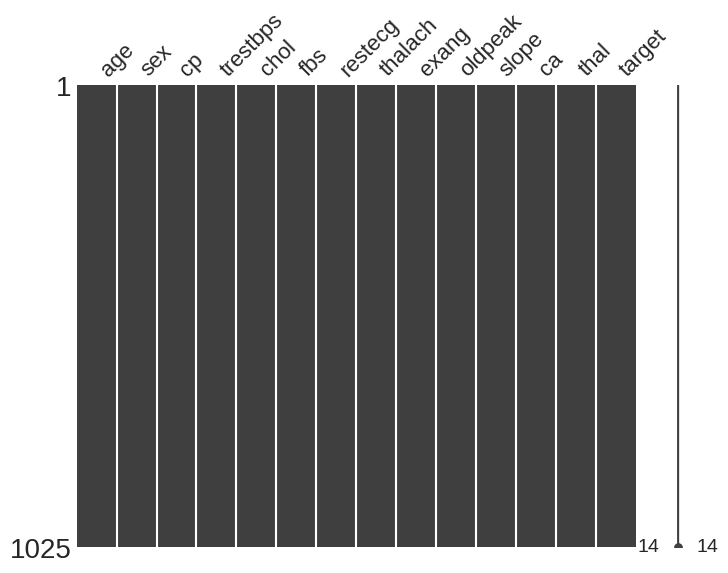

In [177]:
miss.matrix(data, figsize=(8,6))

<Axes: >

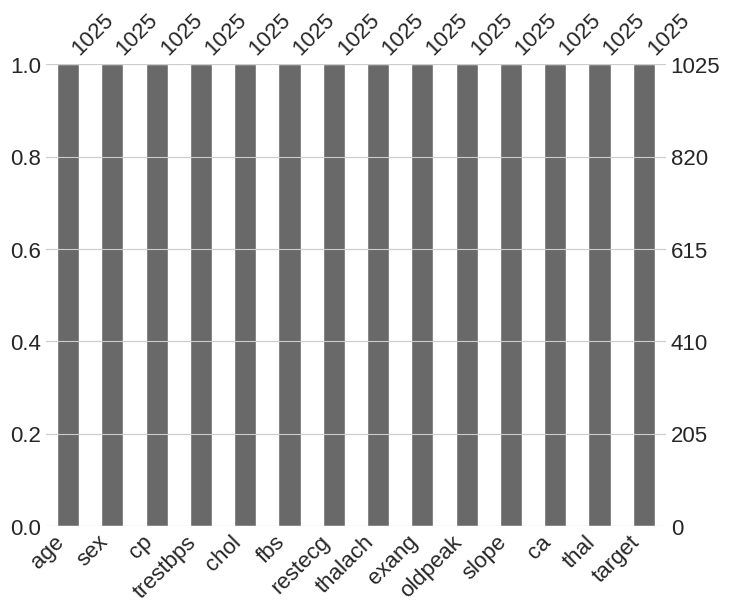

In [178]:
miss.bar(data, figsize=(8,6))

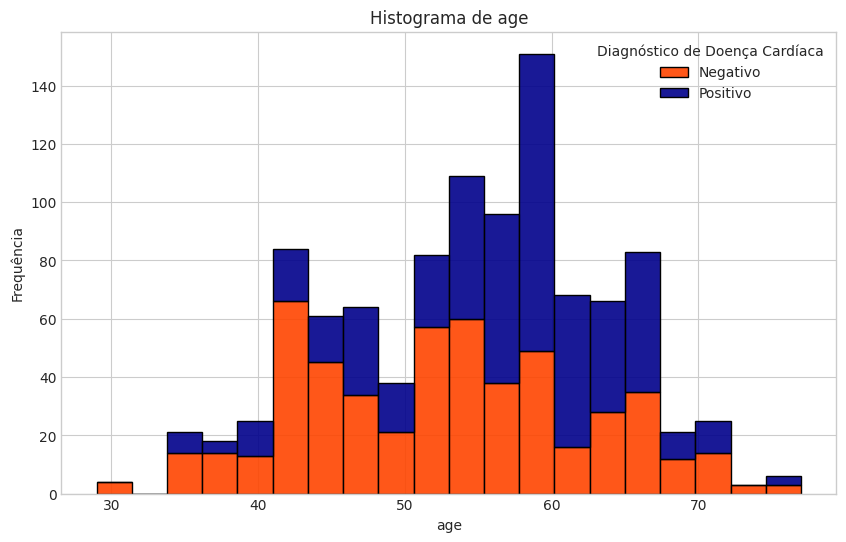

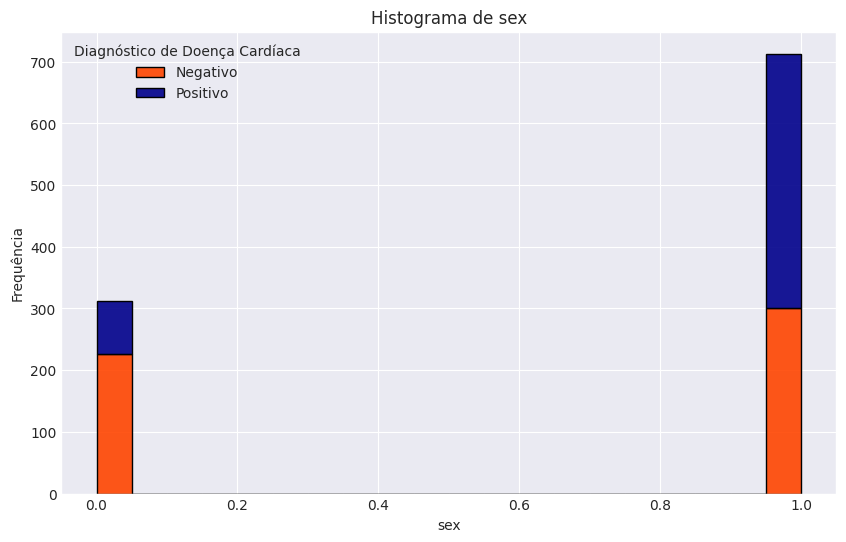

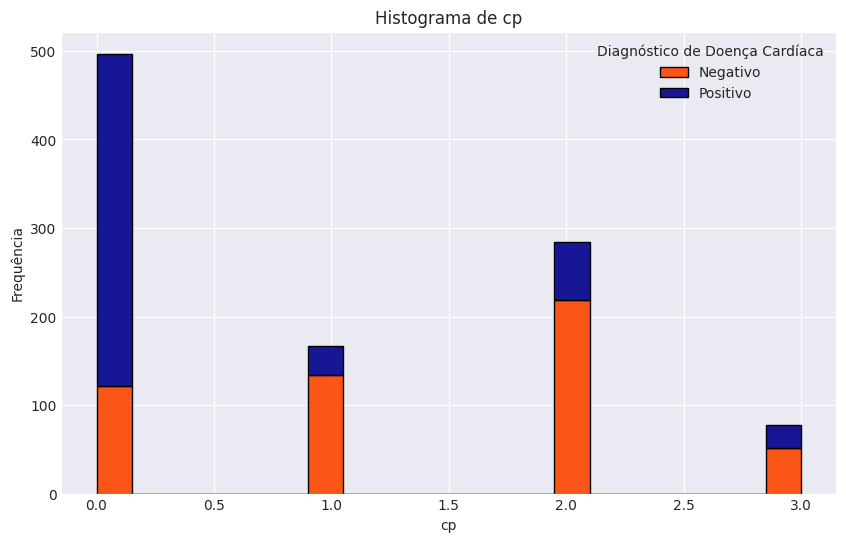

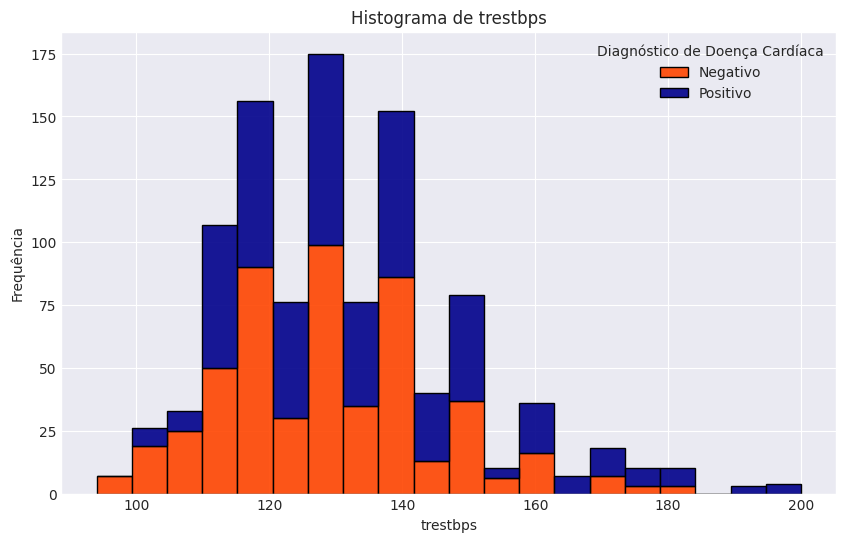

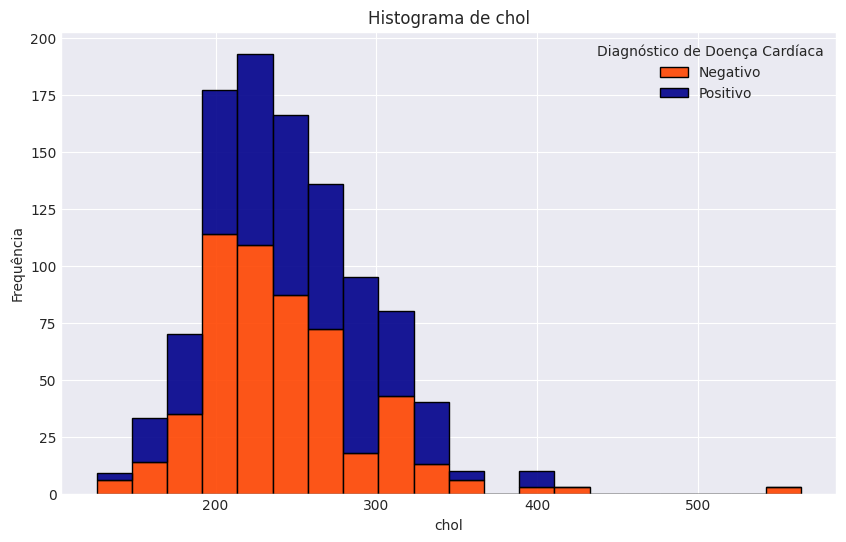

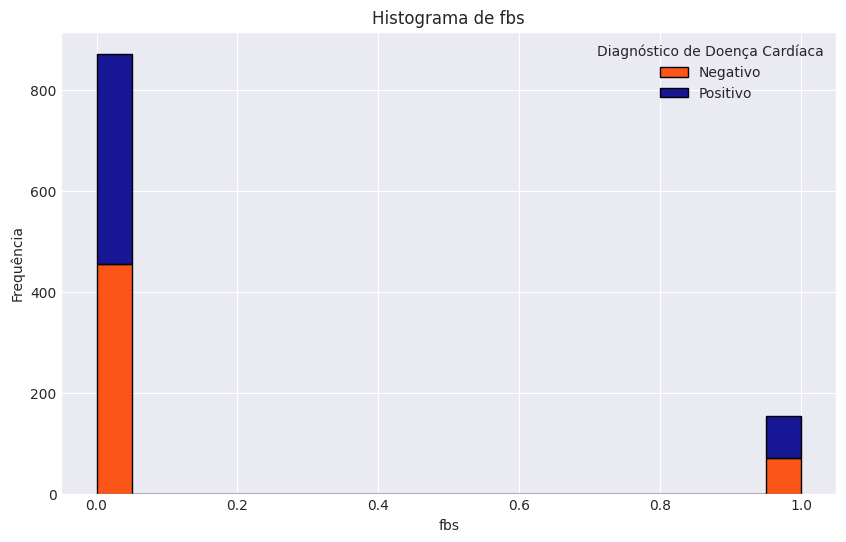

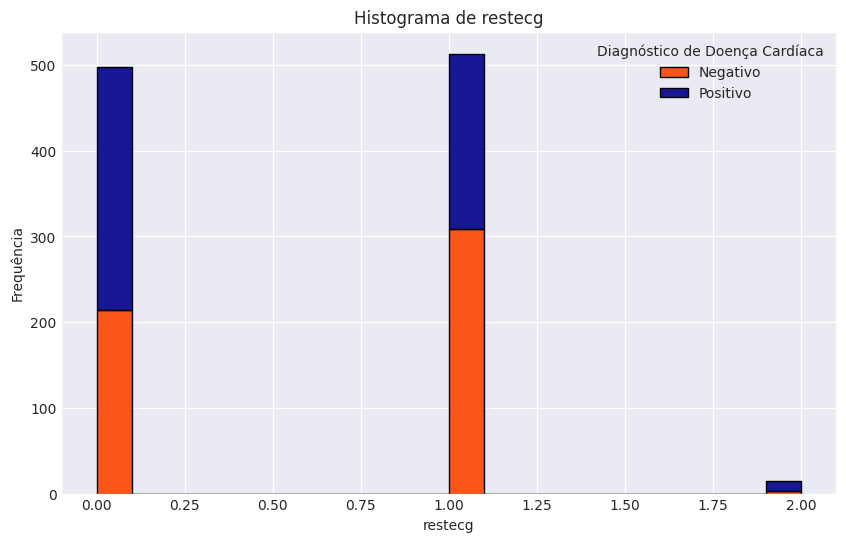

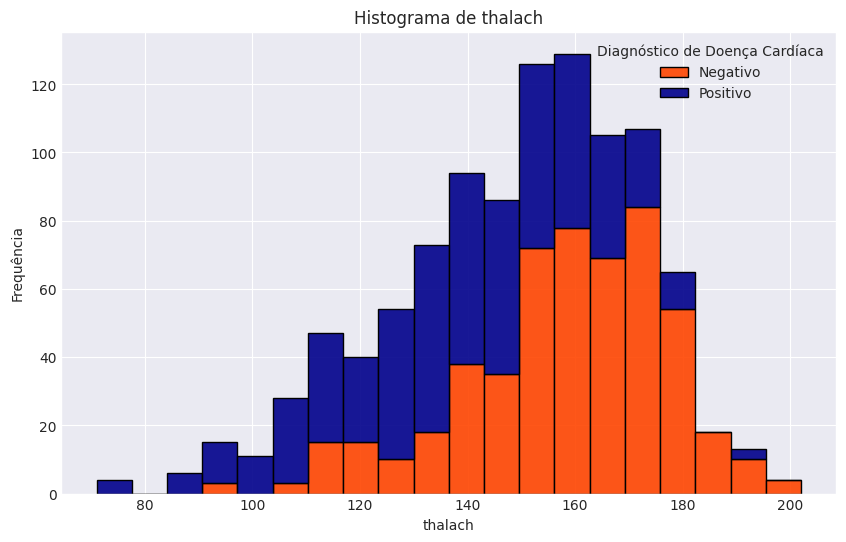

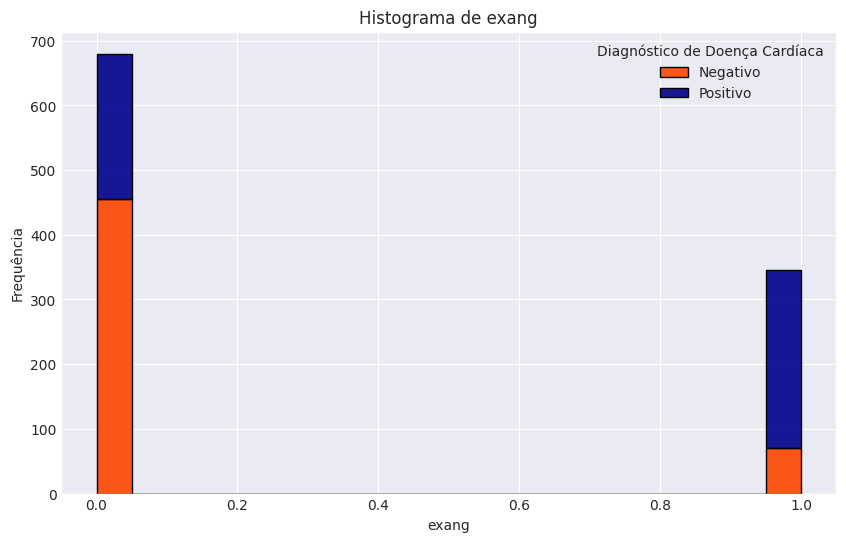

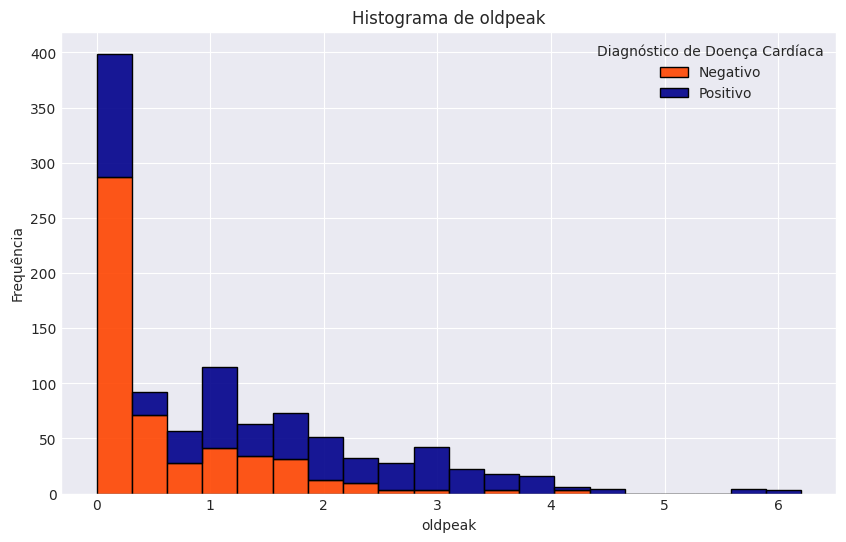

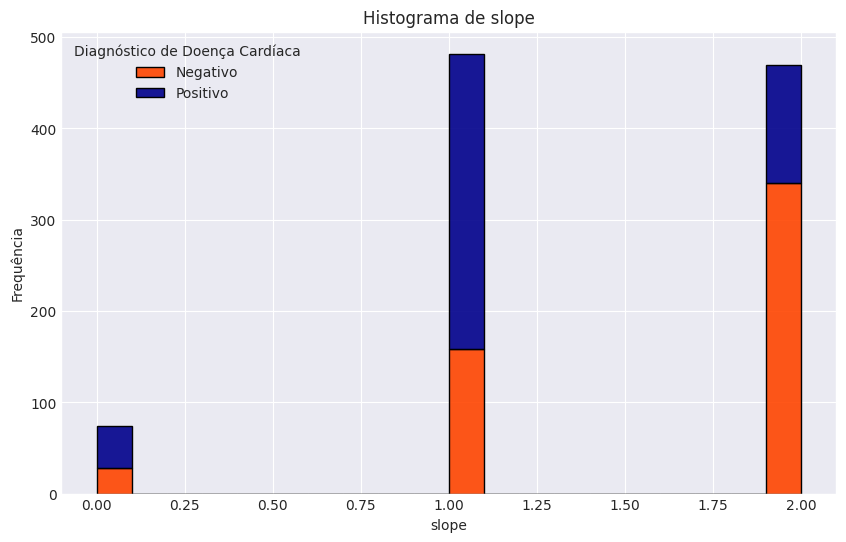

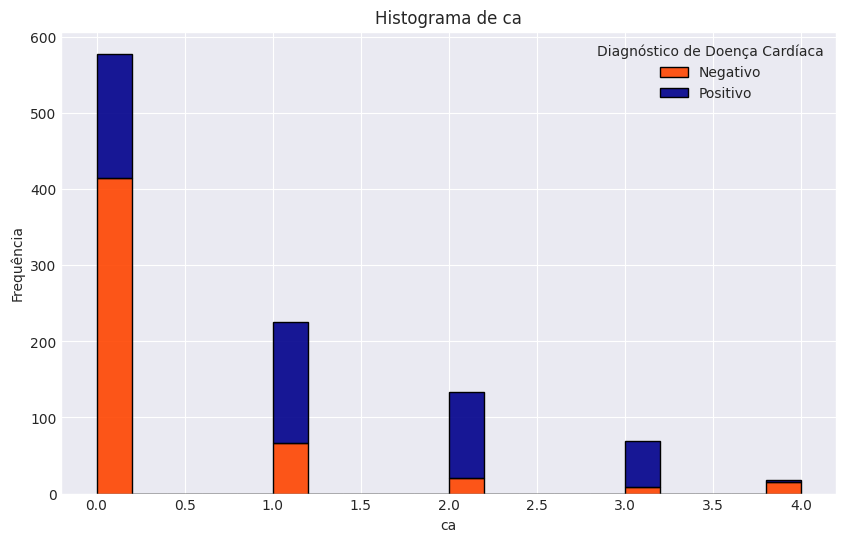

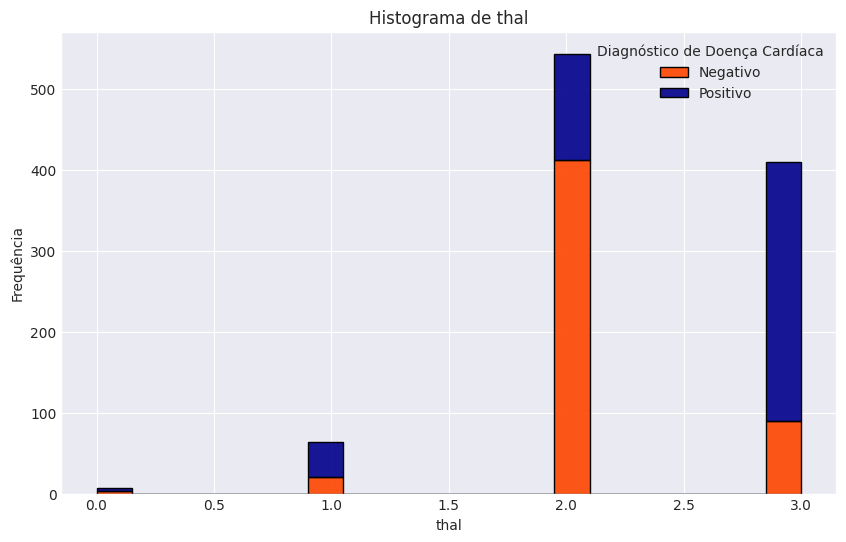

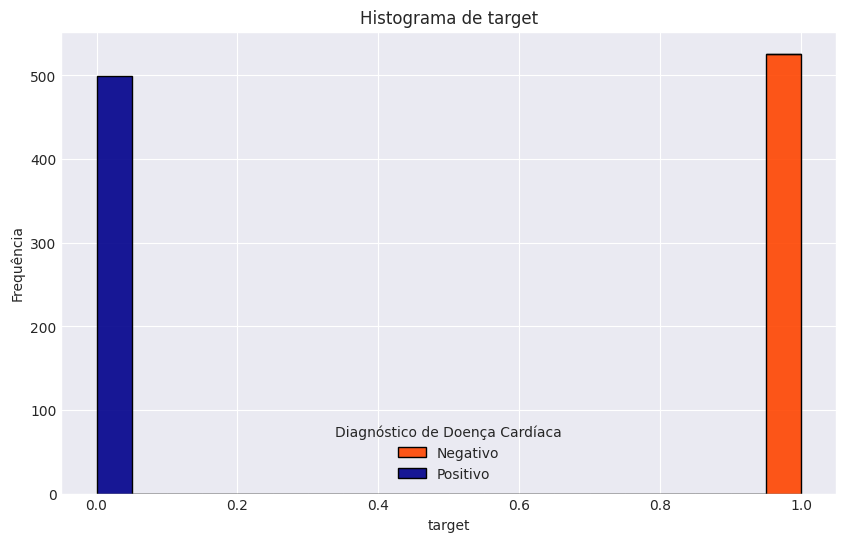

In [179]:
#Histograma para todas as características em relação ao Diagnóstico [Positivo ou Negativo]
for column in data.columns:
    # Verificar se a coluna é do tipo numérico
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(10, 6))

        # Criar o histograma
        sns.histplot(data=data,
                     x=column,
                     hue='target',
                     multiple='stack',
                     bins=20,
                     palette={0: "darkblue", 1: 'orangered'},
                     alpha=0.9,
                     edgecolor='black',
                    )
        sns.set_style("darkgrid")

        # Adicionar título e rótulos
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.legend(title='Diagnóstico de Doença Cardíaca', labels=['Negativo', 'Positivo'])

        # Mostrar o gráfico
        plt.show()

In [180]:
#Gráfico de dispersão para todas as variáveis
sns.pairplot(data,
             hue='target',
             palette={0: 'darkblue', 1: 'orangered'})
plt.title('Gráfico de disperção para todas as variáveis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [181]:
data.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
738,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
827,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
589,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
763,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


### O conjunto de dados possui 1025 instâncias e 14 atributos (características)

# 2 - Análise Descritiva
## Explore as estatísticas descritivas das variáveis, como age, chol, trestbps, e thalach.

*   age: Idade do paciente.
*   trestbps: Pressão arterial em repouso (mm Hg).
*   chol: Colesterol sérico em mg/dl.
*   thalach: Frequência cardíaca máxima atingida.

### Análise Descritiva: Use estatísticas descritivas para entender a distribuição das variáveis do dataset, incluindo medidas de tendência central (média, mediana) e de dispersão (desvio padrão, quartis). Visualização dos Dados: Crie gráficos para visualizar a distribuição dos dados e identificar padrões, como histogramas, boxplots e gráficos de dispersão.


In [182]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


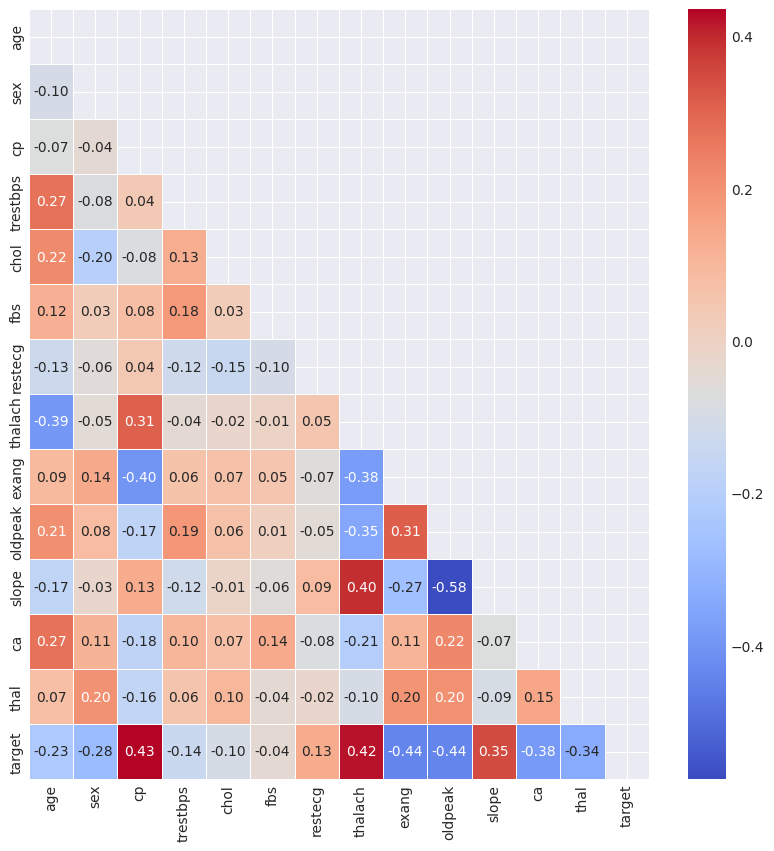

In [183]:
plt.figure(figsize=(10, 10))
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            linewidth=.5,
            fmt=".2f",
            cmap='coolwarm')
plt.show()

# Indicadores do heatmap
* Fortes correlações: As características dor no peito e doença cardíaca  apresentam correlação positiva (0,432080), indicando que certos tipos de dor no peito estão associados a maior probabilidade de doenças cardíacas. Da mesma forma, “Frequência cardíaca máxima também tem uma correlação positiva (0,419955) com a doença, sugerindo que frequências cardíacas mais altas podem estar associadas a doenças cardíacas.



<Axes: >

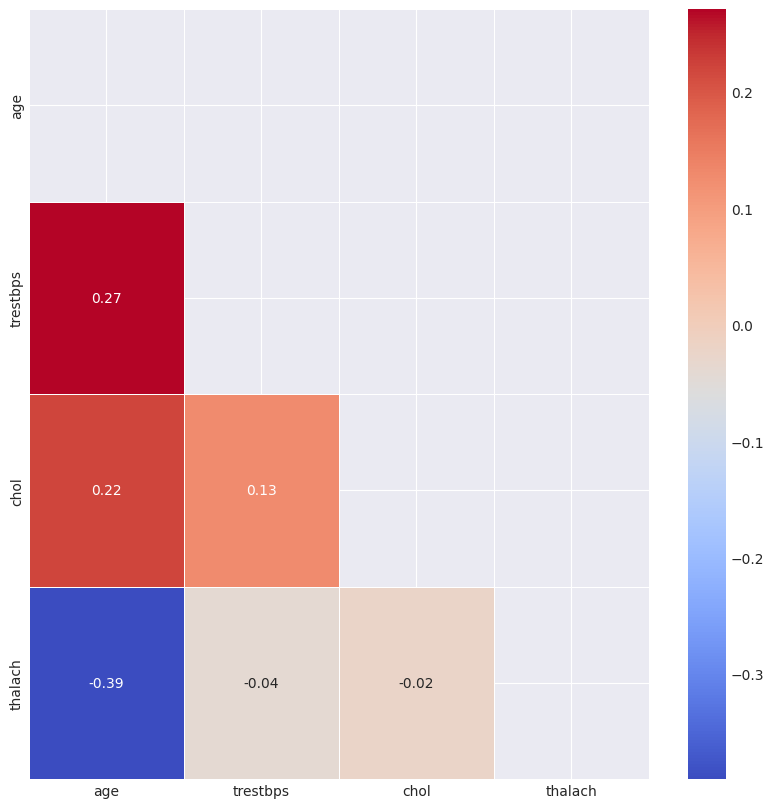

In [184]:
plt.figure(figsize = (10,10))
corr_matrix = (
    data
    .drop(columns=['sex', 'cp', 'fbs', 'restecg',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
    .corr()
)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            linewidth=.5,
            fmt=".2f",
            cmap='coolwarm')

# Análise:
## age: Idade do paciente.
## trestbps(rest_BloodP): Pressão arterial em repouso (mm Hg).
## cholestrol: Colesterol sérico em mg/dl.
## thalac(max_Heart_rate): Frequência cardíaca máxima atingida.

In [185]:
#Doença do coração com Scatter-Plot
#Existem 3 fatores de risco principais para doenças cardíacas. Pressão alta, colesterol alto, fumar.
#De qualquer forma, o gráfico de dispersão mostra 2 fatores de risco principais focados em pessoas acima de 30 anos:
#Doença Cardíaca - Colesterol e Idade
#Doença Cardíaca - Pressão Arterial em Repouso e Idade

acima_30 = data[data['age']>30]
acima_30.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Text(76, 133.61802154750245, '131.62')

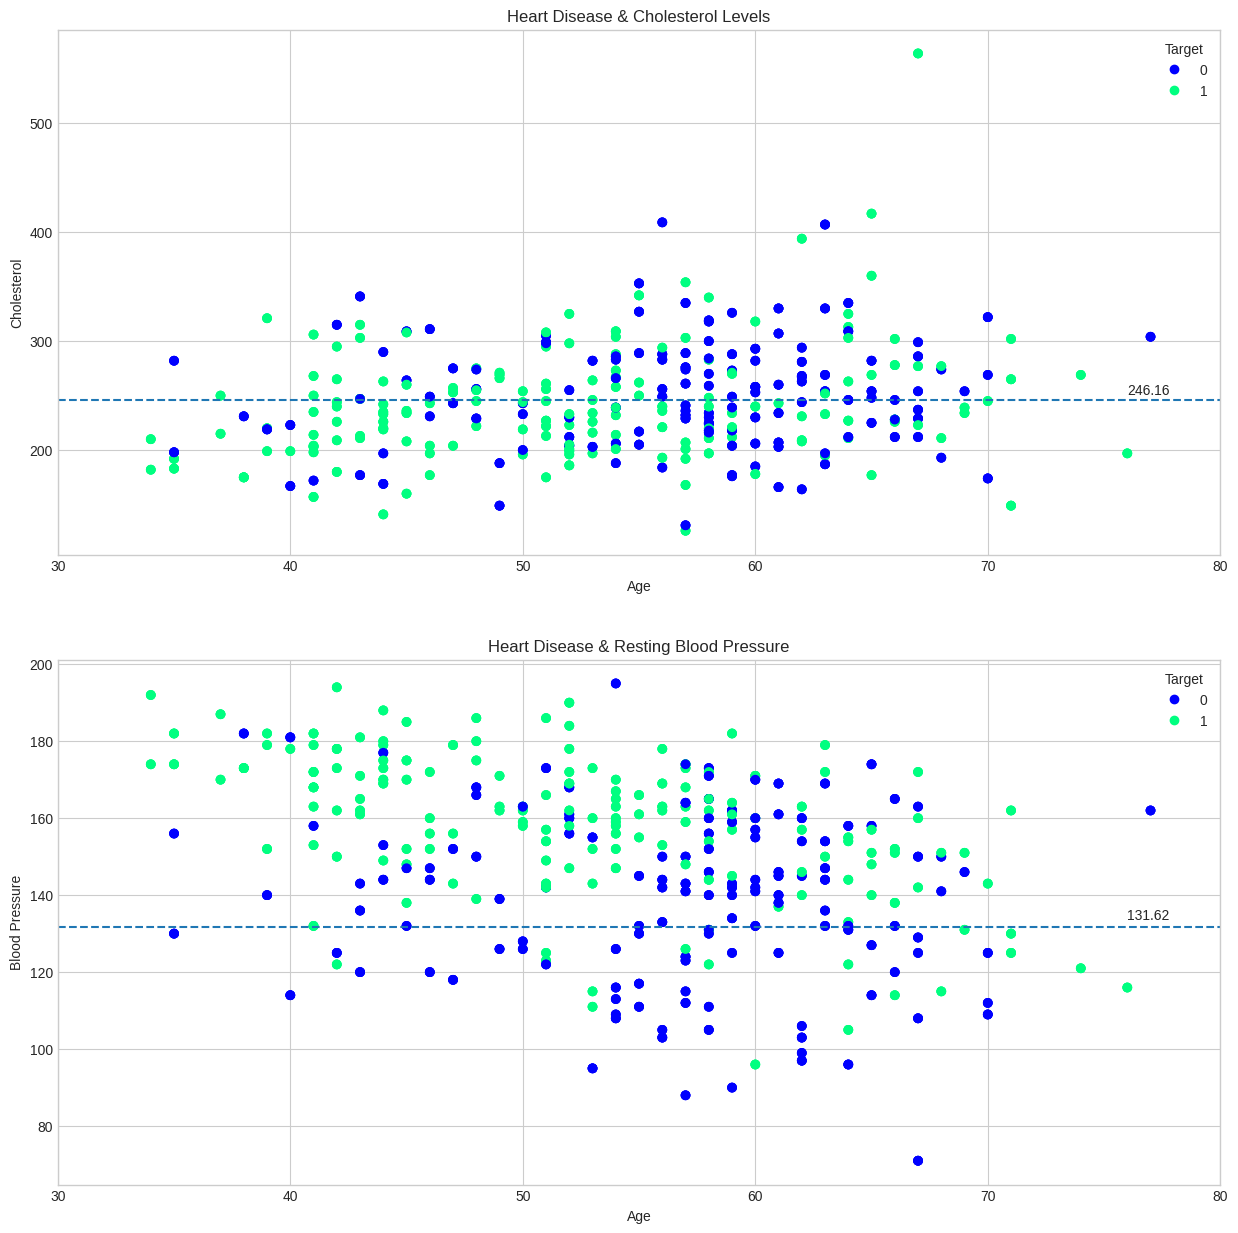

In [186]:
# Configurar Estilo
plt.style.use('seaborn-v0_8-whitegrid')

# subplot de chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(15,15))

###############################
# ax0 Idade x Colesterol
###############################

# Adição de data ao axes ax0
scatter = ax0.scatter(x=acima_30["age"],
                      y=acima_30["chol"],
                      c=acima_30["target"],
                      cmap="winter")

# Customizando ax0
ax0.set(title="Heart Disease & Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol")

ax0.set_xlim([30, 80])  # Mudar x axis limite

# legenda a ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Linha horizontal para média de colesterol
ax0.axhline(y=acima_30["chol"].mean(),
            linestyle="--")
# Adição da Linha horizontal para média de colesterol
ax0.text(76, acima_30["chol"].mean() + 5,
         round(acima_30["chol"].mean(), 2))

#################################################
# ax1 Idade x Frequência cardíaca máxima atingida (thalac)
#################################################

# Adição de data ao axes ax1
scatter = ax1.scatter(x=acima_30["age"],
                      y=acima_30["thalach"],  # freq card max
                      c=acima_30["target"],
                      cmap="winter")  # change plot (matplotlib.org)

# Customizando ax1
ax1.set(title="Heart Disease & Resting Blood Pressure",
        xlabel="Age",
        ylabel="Blood Pressure")

ax1.set_xlim([30, 80])  # Mudança de limite de x axis

# Legenda para ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Linha horizontal para média de Pressao arterial em repouso
ax1.axhline(y=acima_30["trestbps"].mean(),
            linestyle="--")

# Adição da Linha horizontal para média de Pressao arterial em repouso
ax1.text(76, acima_30["trestbps"].mean() + 2,
         round(acima_30["trestbps"].mean(), 2))  # Add mean value to line

In [187]:
data_selected = data[['age', 'chol', 'trestbps', 'thalach']]
data_selected

,age,chol,trestbps,thalach
0,52,212,125,168
1,53,203,140,155
2,70,174,145,125
3,61,203,148,161
4,62,294,138,106
...,...,...,...,...
1020,59,221,140,164
1021,60,258,125,141
1022,47,275,110,118
1023,50,254,110,159


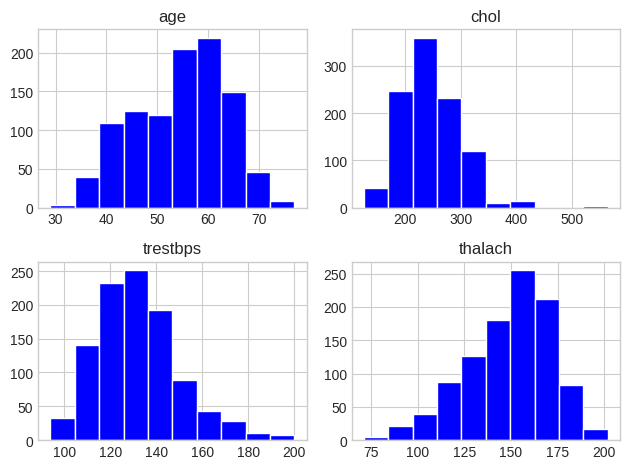

In [188]:
data_selected.hist(bins=10, color='blue')
plt.tight_layout()
plt.show()

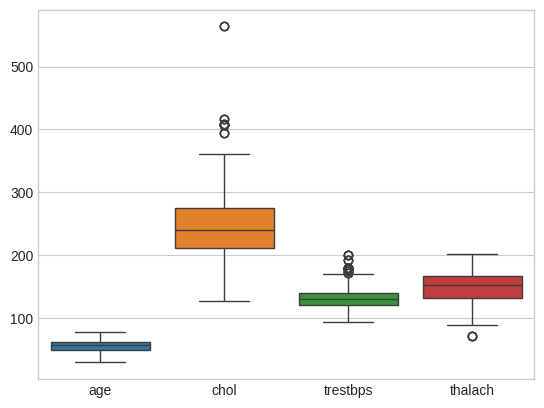

In [189]:
sns.boxplot(data=data_selected)
plt.show()

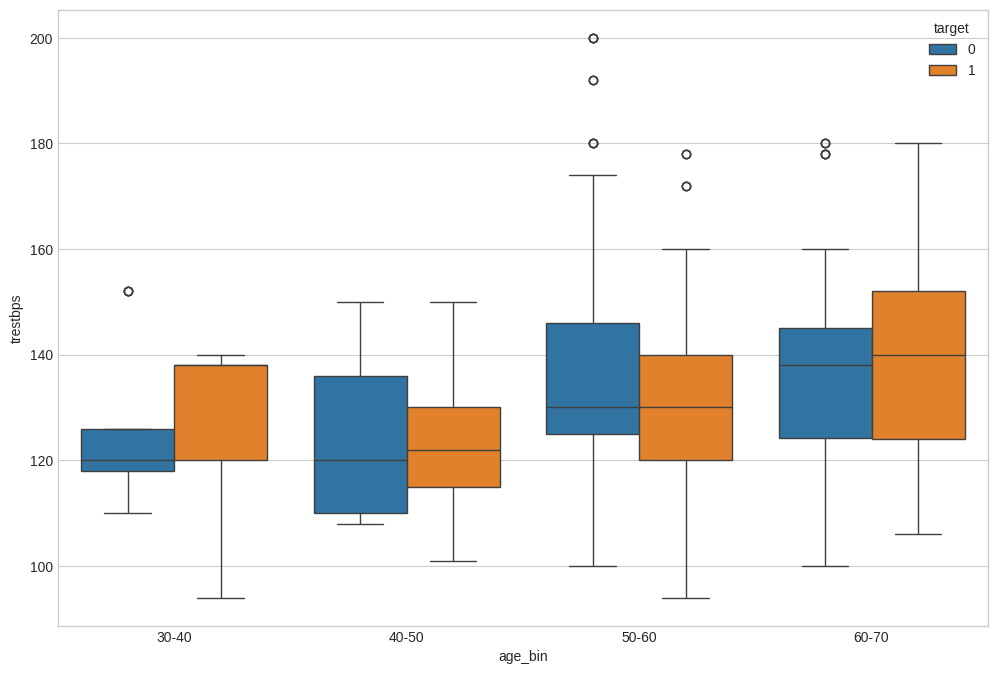

In [190]:
data['age_bin'] = pd.cut(data['age'],
                  bins=[30, 40, 50, 60, 70],
                  labels=['30-40', '40-50', '50-60', '60-70'])

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=data.loc[(data['age']>30) & (data['age']<80)],
    x='age_bin',
    y='trestbps',
    hue='target',
    dodge=True
)
plt.show()

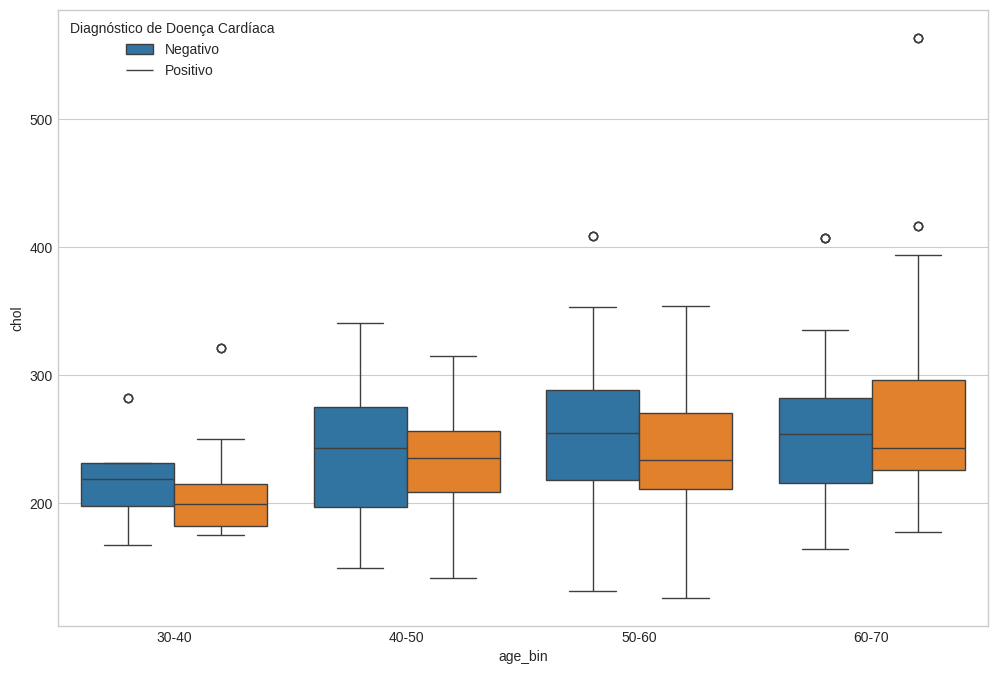

In [191]:
data['age_bin'] = pd.cut(data['age'],
                  bins=[30, 40, 50, 60, 70],
                  labels=['30-40', '40-50', '50-60', '60-70'])

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=data.loc[(data['age']>30) & (data['age']<80)],
    x='age_bin',
    y='chol',
    hue='target',
    dodge=True
)
plt.legend(title='Diagnóstico de Doença Cardíaca', labels=['Negativo', 'Positivo'])
plt.show()

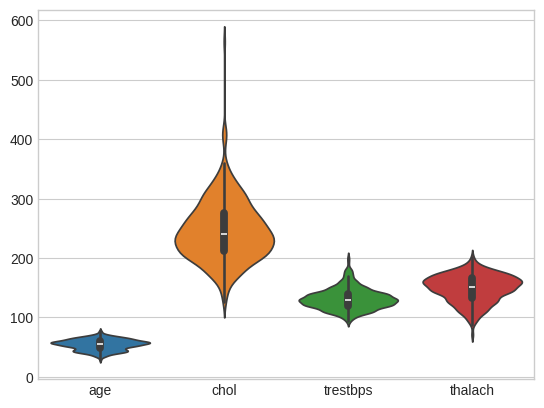

In [192]:
sns.violinplot(data=data_selected)
plt.show()

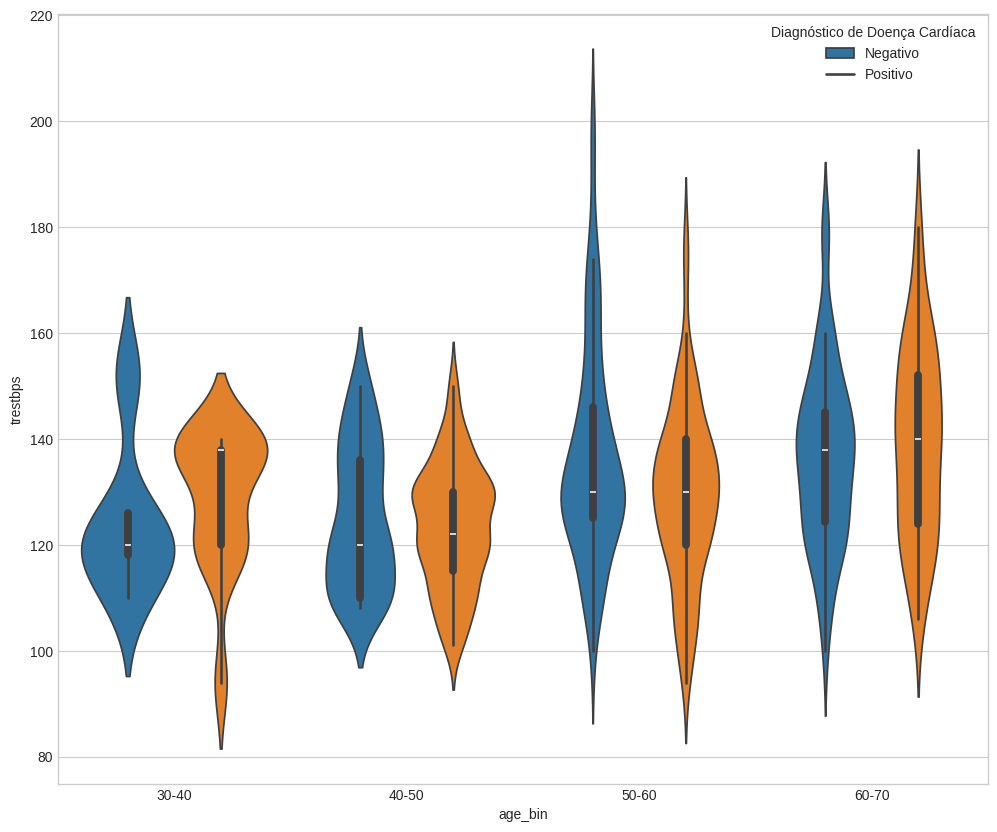

In [193]:
data['age_bin'] = pd.cut(data['age'],
                  bins=[30, 40, 50, 60, 70],
                  labels=['30-40', '40-50', '50-60', '60-70'])

plt.figure(figsize=(12, 10))
sns.violinplot(
    data=data.loc[(data['age']>30) & (data['age']<80)],
    x='age_bin',
    y='trestbps',
    hue='target',
    dodge=True
)
plt.legend(title='Diagnóstico de Doença Cardíaca', labels=['Negativo', 'Positivo'])
plt.show()

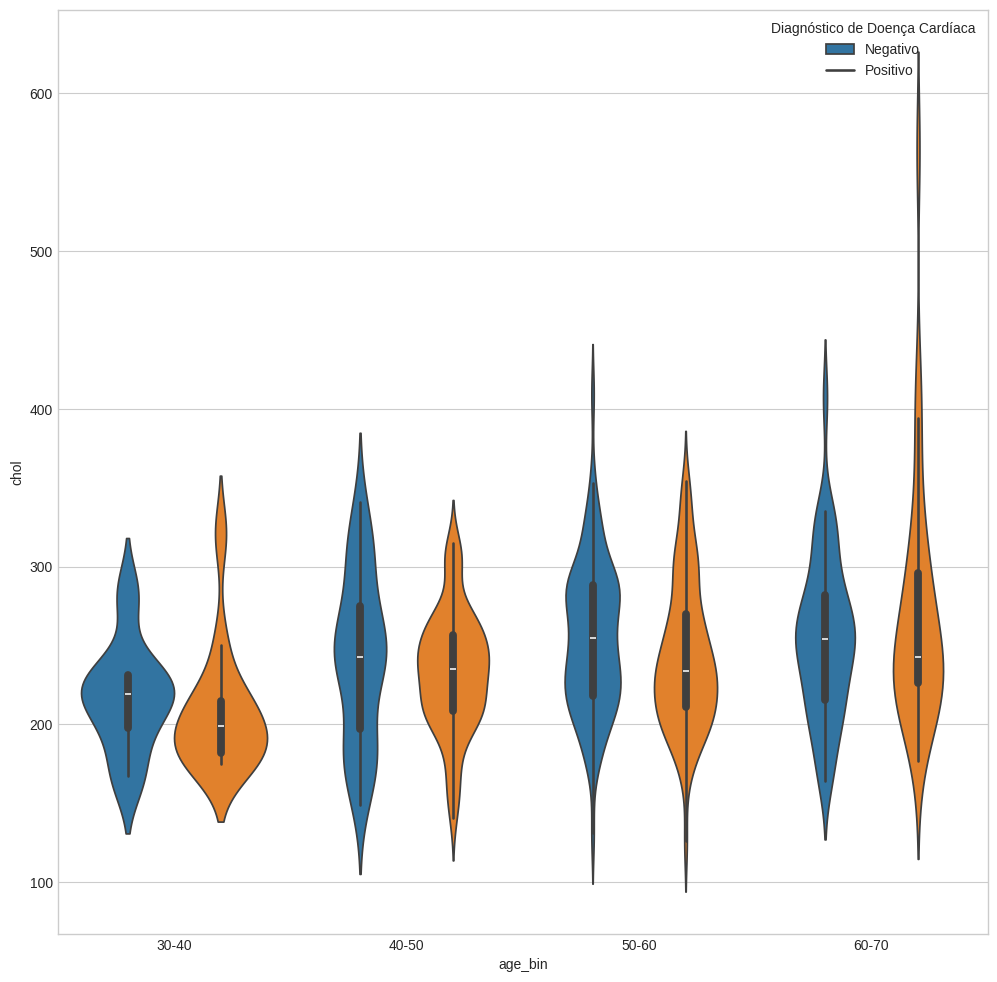

In [194]:
data['age_bin'] = pd.cut(data['age'],
                  bins=[30, 40, 50, 60, 70],
                  labels=['30-40', '40-50', '50-60', '60-70'])

plt.figure(figsize=(12, 12))
sns.violinplot(
    data=data.loc[(data['age']>30) & (data['age']<80)],
    x='age_bin',
    y='chol',
    hue='target',
    dodge=True
)
plt.legend(title='Diagnóstico de Doença Cardíaca', labels=['Negativo', 'Positivo'])
plt.show()

In [195]:
display(data.loc[(data['age']>30) & (data['age']<80)])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bin
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,50-60
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,50-60
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,60-70
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,60-70
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,50-60
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,50-60
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,40-50
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,40-50


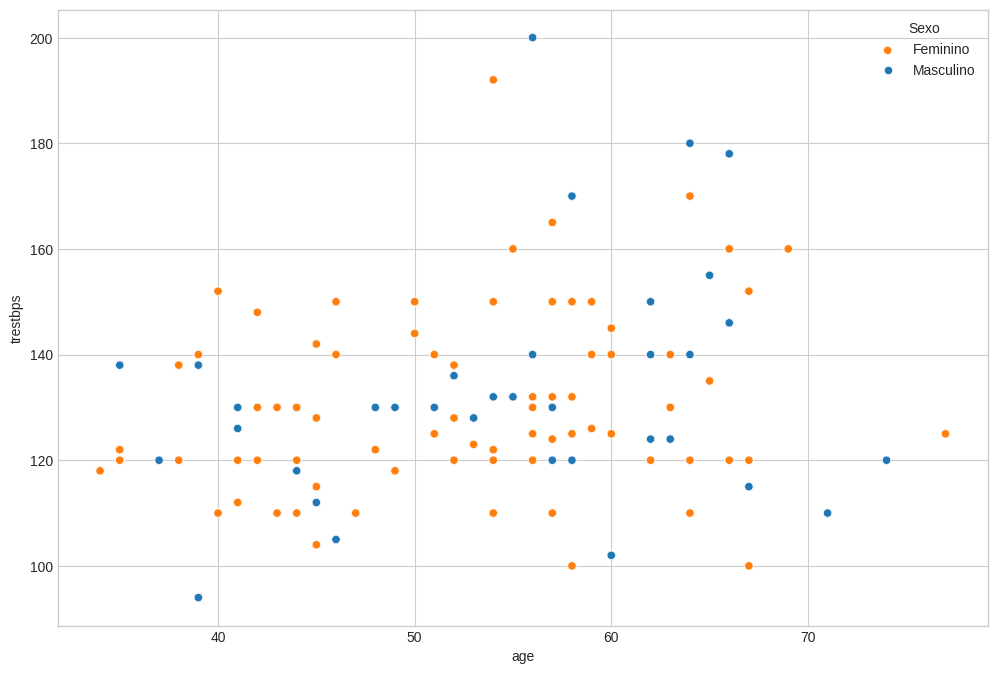

In [196]:
#Scatterplot age x chol
plt.figure(figsize=(12, 8))
data['age_bin'] = pd.cut(data['age'],
                  bins=[30, 40, 50, 60, 70],
                  labels=['30-40', '40-50', '50-60', '60-70'])
sns.scatterplot(
    data=data.loc[(data['age']>=30) & (data['age']<80)]
    .loc[data['chol']],
    x='age',
    y='trestbps',
    hue='sex'
)
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])
plt.show()

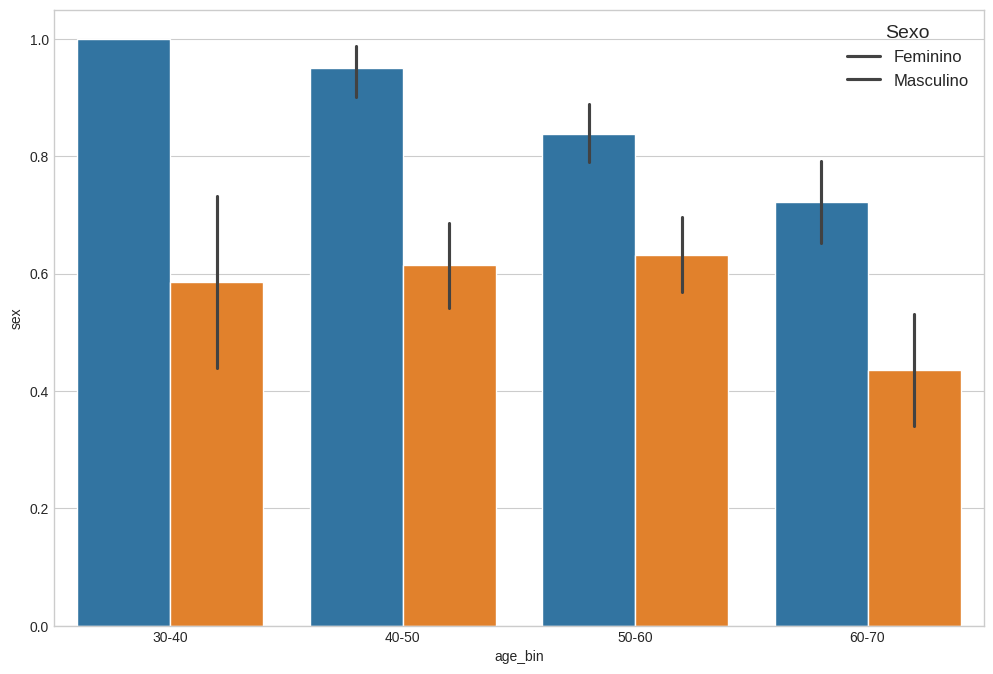

In [197]:
plt.figure(figsize=(12, 8))

data['age_bin'] = pd.cut(data['age'],
                  bins=[30, 40, 50, 60, 70],
                  labels=['30-40', '40-50', '50-60', '60-70'])
sns.barplot(
    data=data.loc[(data['age']>30) & (data['age']<80)],
    x='age_bin',
    y='sex',
    hue='target'
)
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'], fontsize=12, title_fontsize=14, markerscale=2)
plt.show()

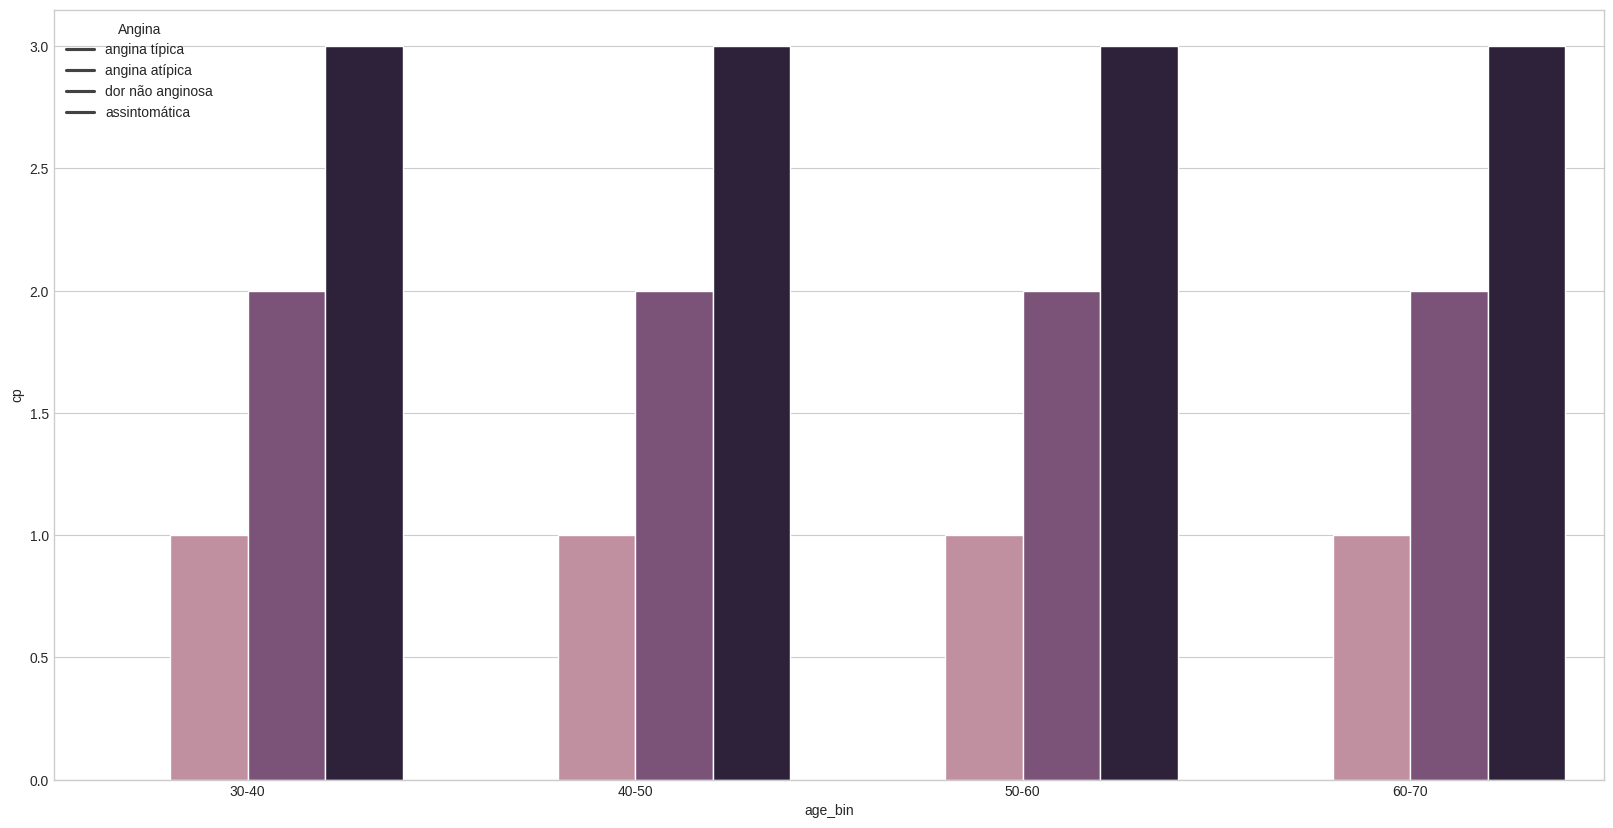

In [198]:
plt.figure(figsize=(20, 10))

data['age_bin'] = pd.cut(data['age'],
                  bins=[30, 40, 50, 60, 70],
                  labels=['30-40', '40-50', '50-60', '60-70'])
sns.barplot(
    data=data.loc[(data['age']>30) & (data['age']<80)],
    x='age_bin',
    y='cp',
    hue='cp'
)
plt.legend(title='Angina', labels=['angina típica', 'angina atípica', 'dor não anginosa', 'assintomática' ])
plt.show()

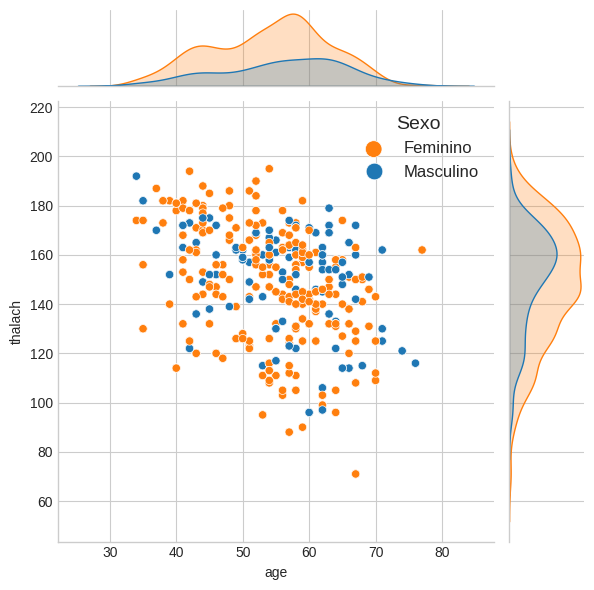

In [199]:
sns.jointplot(
    data=data.loc[(data['age']>30) & (data['age']<80)]
    .loc[lambda f: f['trestbps']>=100],
    x='age',
    y='thalach',
    hue='sex'
)
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'], fontsize=12, title_fontsize=14, markerscale=2)
plt.show()

# Correlações Fortes:
## heart_dis_diag x chest Pain
## heart_dis_diag x max_Heart_rate
## heart_dis_diag x exerc_type
## heart_dis_diag x resting_ECG

# Modelo Explicativo: Regressão Logística
Construa um modelo de regressão logística para prever a presença de doença cardíaca (target) usando variáveis como age, sex, cp, chol, thalach, e ca.

#Tarefa de Pré-processamento


* cp: Tipo de dor no peito (4 valores: 1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 4 = assintomática).
* thal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível.
* slope: Inclinação do segmento ST no pico do exercício (1 = subida; 2 = plana; 3 = descendente).

In [200]:
ohe = OneHotEncoder()

In [201]:
data_sex = pd.DataFrame(ohe.fit_transform(data[['sex']]).toarray())

In [202]:
data_sex.head(3)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0


In [203]:
data_sex.rename(columns={0:'feminino',1:'masculino'},inplace=True)

In [204]:
data_sex.shape

(1025, 2)

In [205]:
encoded_data = data.join(data_sex)

In [206]:
df_encoded = encoded_data
df_encoded

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bin,feminino,masculino
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,50-60,0.0,1.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,50-60,0.0,1.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,60-70,0.0,1.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,60-70,0.0,1.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,60-70,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,50-60,0.0,1.0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,50-60,0.0,1.0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,40-50,0.0,1.0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,40-50,1.0,0.0


In [207]:
df_encoded_data2 = pd.get_dummies(df_encoded, columns=['cp', 'thal', 'slope'], drop_first=True, dtype=int)
df_encoded_data2.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'age_bin', 'feminino', 'masculino', 'cp_1',
       'cp_2', 'cp_3', 'thal_1', 'thal_2', 'thal_3', 'slope_1', 'slope_2'],
      dtype='object')

In [208]:
df_encoded_data2 = df_encoded_data2.drop(columns=['trestbps','fbs', 'restecg', 'exang', 'oldpeak', 'sex', 'age_bin'], axis=1)

In [209]:
df_encoded_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   chol       1025 non-null   int64  
 2   thalach    1025 non-null   int64  
 3   ca         1025 non-null   int64  
 4   target     1025 non-null   int64  
 5   feminino   1025 non-null   float64
 6   masculino  1025 non-null   float64
 7   cp_1       1025 non-null   int64  
 8   cp_2       1025 non-null   int64  
 9   cp_3       1025 non-null   int64  
 10  thal_1     1025 non-null   int64  
 11  thal_2     1025 non-null   int64  
 12  thal_3     1025 non-null   int64  
 13  slope_1    1025 non-null   int64  
 14  slope_2    1025 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 120.2 KB


In [210]:
df_encoded_data2.shape

(1025, 15)

In [211]:
y = df_encoded_data2['target']
y.shape

(1025,)

In [212]:
#Variáveis independentes para classificação
X = df_encoded_data2.drop('target', axis=1)

In [213]:
X.shape

(1025, 14)

# Encontrando os melhores atributos para classificação

<ipython-input-214-a02f27a63871>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')


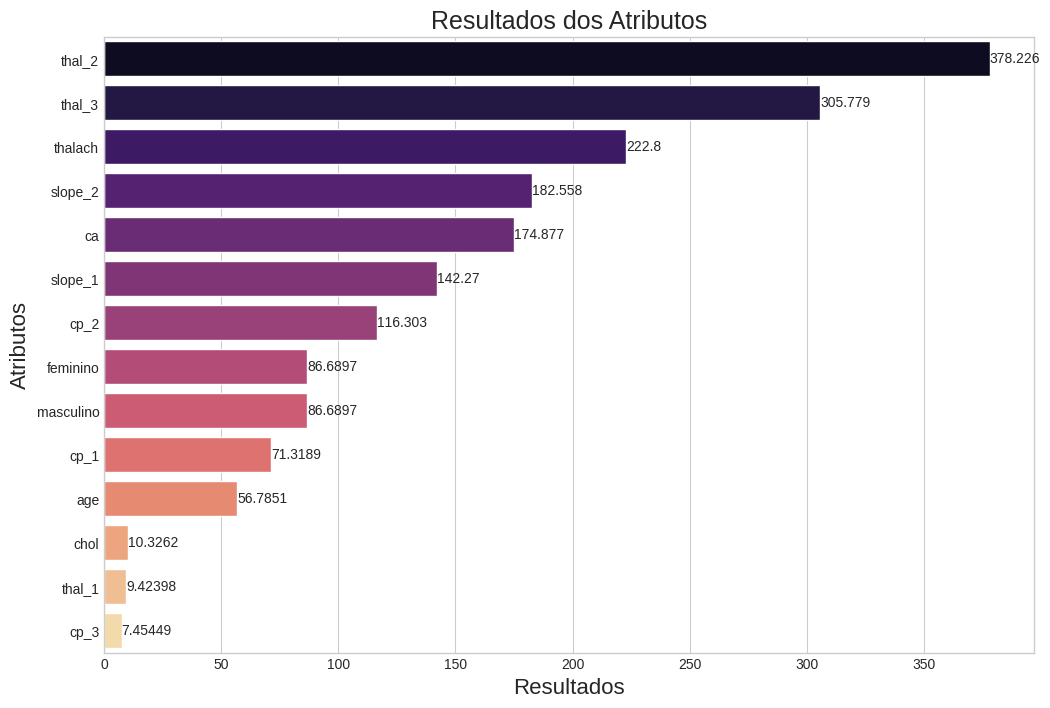

In [214]:
# Descubrir os melhores atributos para o modelo entre todas as características.

## Inicializando a classe SelectKBest para encontrar características e aplicando nas variáveis X e y
selector = SelectKBest(f_classif, k=14)
X_selected = selector.fit_transform(X,y)

## Criando uma lista de todas as colunas e suas pontuações em variáveis
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

## Criando um Novo Dataframe para armazenar características e suas pontuações
feature_score_df = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

## Ordenando o novo dataframe em ordem decescente
feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

## Plotando um barplot para melhor insight sobre os atributos e resultados
plt.figure(figsize=(12,8))
ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'], palette='magma')
plt.title('Resultados dos Atributos', fontsize=18)
plt.xlabel('Resultados', fontsize=16)
plt.ylabel('Atributos', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)


# 1. Divisão Inicial dos Dados

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [216]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(717, 14)

(308, 14)

(717,)

(308,)

#2. Normalização

In [217]:
scale = StandardScaler()

In [218]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [219]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(717, 14)
(308, 14)
(717,)
(308,)


# 3.  Aplicação do Grid Search CV
- Após a divisão inicial, o próximo passo é aplicar o Grid Search (ou outra técnica de otimização de hiperparâmetros) usando apenas o conjunto de treinamento. O objetivo é buscar a combinação de hiperparâmetros que maximize o desempenho do modelo no conjunto de treinamento, sem "olhar" para os dados de teste.

In [220]:
# Definir a grade de hiperparâmetros para 'l1'
param_grid_l1 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['saga']
}

# Definir a grade de hiperparâmetros para 'l2'
param_grid_l2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Definir a grade de hiperparâmetros para 'elasticnet'
param_grid_elasticnet = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.9],
    'solver': ['saga']
}

In [221]:
# Combinar todas os grids
param_grid = [param_grid_l1, param_grid_l2, param_grid_elasticnet]
param_grid

[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['saga']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'penalty': ['elasticnet'],
  'l1_ratio': [0.1, 0.5, 0.9],
  'solver': ['saga']}]

In [222]:
model=LogisticRegression()

In [223]:
# Configurando o GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # Número de folds para validação cruzada
    scoring='accuracy',  # Métrica de avaliação
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Verborrágico
)

In [224]:
# Ajustando o GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1'], 'solver': ['saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.5, 0.9],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy', verbose=1)

In [225]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [226]:
# Melhor modelo ajustado
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [227]:
# Fazendo previsões com o melhor modelo
y_pred = best_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [228]:
# Avaliando a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo com melhores parâmetros: {acuracia*100:.2f}%')

Acurácia do modelo com melhores parâmetros: 87.01%


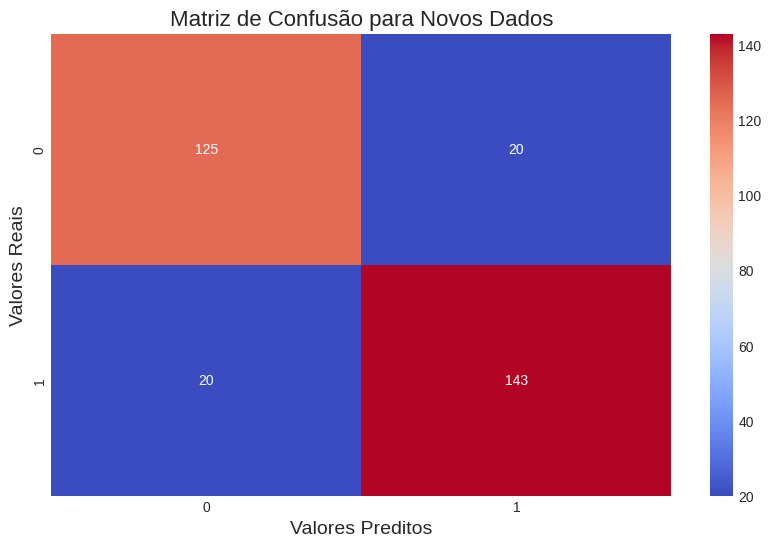

In [229]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
plt.title('Matriz de Confusão para Novos Dados', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Valores Preditos', fontsize=14)
plt.ylabel('Valores Reais', fontsize=14)
plt.show()

In [230]:
# print("Accuracy : ",accuracy_score(y_test,y_predict))
# print("Precision  : ",precision_score(y_test,y_predict))
# print("Recall  : ",recall_score(y_test,y_predict))
print(f'Relatório de Classificação:\n {(classification_report(y_test, y_pred))}')

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       145
           1       0.88      0.88      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



In [231]:
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Metricas:")
print(f'Acuracia: {acuracia*100:.2f}%')
print(f'Precisao: {precisao*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'f1-score: {f1*100:.2f}%')

Metricas:
Acuracia: 87.01%
Precisao: 87.73%
Recall: 87.73%
f1-score: 87.73%


# Curva ROC e AUC Score

In [232]:
best_model = LogisticRegression(max_iter=10000)
best_model.fit(X_train, y_train)
y_probs = best_model.predict_proba(X_test)[:, 1]

<ipython-input-233-24ac4772cd48>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', color='orangered')


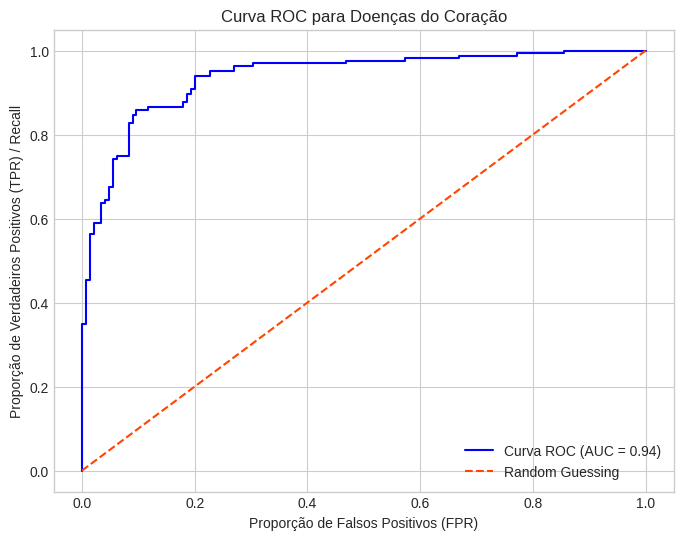

In [233]:
#Calculo da curva ROC e AUC

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plotar a ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', color='orangered')
plt.xlabel('Proporção de Falsos Positivos (FPR)')
plt.ylabel('Proporção de Verdadeiros Positivos (TPR) / Recall')
plt.title('Curva ROC para Doenças do Coração')
plt.legend()
plt.show()

In [234]:
def plot_logistic_function(x_min=-10, x_max=10, k=1, x0=0, num_points=500):
    """
    Plota a função logística no intervalo [x_min, x_max].

    Parâmetros:
    - x_min: limite inferior do intervalo x
    - x_max: limite superior do intervalo x
    - k: coeficiente que controla a inclinação
    - x0: ponto de inflexão (deslocamento horizontal)
    - num_points: número de pontos para plotar
    """
    # Gera os valores de x
    x = np.linspace(x_min, x_max, num_points)

    # Calcula a função logística
    y = 1 / (1 + np.exp(-k * (x - x0)))

    # Cria o gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'k={k}, x0={x0}')
    plt.title('Gráfico da Função Logística')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.axvline(x=x0, color='gray', linestyle='--', label='x0')
    plt.axhline(y=0.5, color='red', linestyle='--', label='f(x)=0.5')
    plt.legend()
    plt.show()

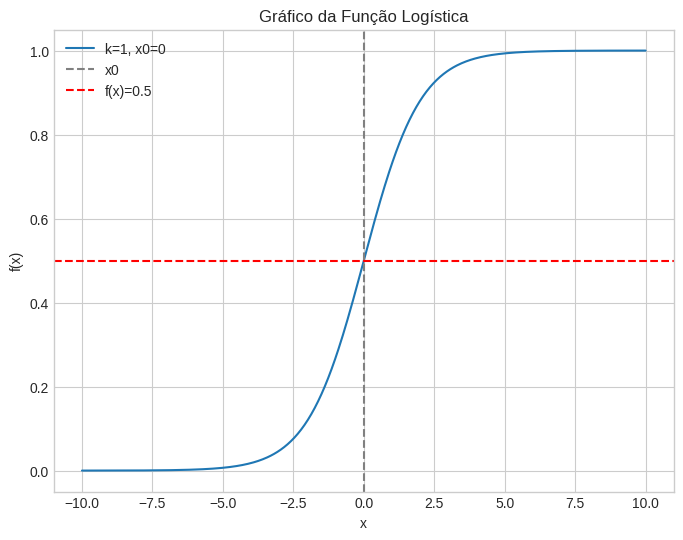

In [235]:
# Exemplo de uso
plot_logistic_function(k=1, x0=0)

# Conclusão

#Visão Geral do Projeto
 - O objetivo deste projeto foi analisar um conjunto de dados relacionados a doenças cardíacas e desenvolver um modelo preditivo para identificar indivíduos em risco de doenças cardíacas. O conjunto de dados consiste em 1025 entradas e 14 atributos, que inclui informações sobre medições clínicas e indicadores diagnósticos. A Atividade 1 proposta envolveu exploração de dados, visualização, seleção de características, a aplicação de um modelo de regressão logística, técnicas de validação cruzada para avaliar o desempenho do um modelo de forma mais robusta e confiável, além de busca por melhores parâmetros, no inutito de prever a presença de doenças cardíacas.

- Compreensão e Exploração de Dados

Estrutura de Dados: O conjunto de dados contpem 14 colunas, incluindo variáveis numéricas e categóricas. A variável alvo é binária, indicando a presença (1) ou ausência (0) de doença cardíaca.
Prévia dos Dados: A exploração inicial revelou uma diversidade de idades e indicadores clínicos, sem valores ausentes presentes no conjunto de dados.
Visão Estatística: Estatísticas descritivas forneceram insights sobre a distribuição de características, como idade, níveis de colesterol e frequência cardíaca máxima. A idade média dos indivíduos no conjunto de dados era de aproximadamente 54 anos, com uma leve predominância masculina.

Visualização de Dados

1. Gráficos de Contagem: As visualizações destacaram a distribuição de variáveis categóricas, revelando que:
Os homens eram mais prevalentes no conjunto de dados em comparação às mulheres.
Certos tipos de dor no peito eram mais comuns, indicando diferentes níveis de gravidade entre os indivíduos.
Um número significativo de indivíduos apresentava níveis elevados de glicose no sangue em jejum, sugerindo uma possível ligação com o diabetes.
2. Gráficos de Caixa e Histogramas: Esses gráficos ilustraram a dispersão e a distribuição de características numéricas, como pressão arterial em repouso e níveis de colesterol, ajudando a identificar potenciais outliers e tendências nos dados.

Seleção e Engenharia de Atributos

1. Análise de Correlação: Uma matriz de correlação foi gerada para avaliar as relações entre as características e a variável alvo. Os principais insights incluíram:
O tipo de dor no peito e a frequência cardíaca máxima mostraram correlações positivas com a variável-alvo.
O pico antigo e a angina induzida por exercício apresentaram correlações negativas, indicando seu potencial como fatores de risco para doenças cardíacas.

2. Seleção de Recursos: Utilizando o método SelectKBest, foram eliminadas as características com baixa correlação com o alvo, refinando o conjunto de dados para melhorar o desempenho do modelo.

Desenvolvimento de Modelo

1. Regressão Logística: O conjunto de dados foi dividido em conjuntos de treinamento e teste, e um modelo de regressão logística foi treinado com os dados de treinamento.

2. Avaliação do Modelo: O desempenho foi avaliado utilizando uma matriz de confusão, relatório de classificação e análise da curva ROC:

A matriz de confusão indicou uma forte capacidade de classificar corretamente tanto os casos positivos quanto os negativos.
O relatório de classificação forneceu precisão, recall e pontuações F1, destacando a eficácia do modelo em identificar doenças cardíacas.
A curva ROC e a pontuação AUC (0,94) confirmaram a excelente capacidade discriminativa do modelo.

Insights e Conclusões


A análise revelou insights significativos sobre os fatores de risco associados a doenças cardíacas, enfatizando a importância de características como o tipo de dor no peito, a frequência cardíaca máxima e o pico antigo na previsão de doenças cardíacas.

O modelo de regressão logística demonstrou fortes capacidades preditivas, tornando-se uma ferramenta valiosa para identificar indivíduos em risco de doenças cardíacas.

O projeto destaca o potencial das abordagens baseadas em dados na saúde, possibilitando intervenções direcionadas e melhores resultados para os pacientes.

Em conclusão, este projeto combinou com sucesso a exploração de dados, visualização e técnicas de aprendizado de máquina para desenvolver um modelo preditivo robusto para doenças cardíacas. As informações obtidas a partir da análise podem ajudar os profissionais de saúde a compreender os fatores de risco e a personalizar estratégias de prevenção, contribuindo, em última instância, para uma melhor gestão da saúde e cuidado ao paciente.